In [14]:
import os
import pandas as pd 
import numpy as np
import textwrap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.stats import pearsonr
import os 
from tqdm import tqdm 
import matplotlib.pyplot as plt
import sys
from scipy import stats
from adjustText import adjust_text

CURR_PATH = os.path.abspath('/Users/chloesavignac/_bzdok_lab_notebooks/Project_1/_notebooks')
#CURR_PATH = os.path.abspath('/Users/chloesavignac/_CCA_plots/november/miami_apoe')
NEW_PATH = '/Users/chloesavignac/_bzdok_lab_notebooks/Project_1/_notebooks'
os.chdir(NEW_PATH)

import manhattan_plot_util8 as man_plot
os.chdir(CURR_PATH)


In [15]:
import importlib
os.chdir(NEW_PATH)
importlib.reload(man_plot)
os.chdir(CURR_PATH)

In [4]:
BASE_FOLDER = '/Users/chloesavignac/_bzdok_lab_notebooks/Project_1/_notebooks/Manhattan_Plots'
y_group = "_miller_mh_v1"

ukbb_y, y_desc_dict, y_cat_dict = man_plot.load_phenom(y_group, BASE_FOLDER)

ukbb_y.head()

userID  670_1.0  670_2.0  670_3.0  670_4.0  680_1.0  680_2.0  680_3.0  \
0  1000124.0      1.0      0.0      0.0      0.0      0.0      1.0      0.0   
1  1000181.0      1.0      0.0      0.0      0.0      1.0      0.0      0.0   
2  1000231.0      1.0      0.0      0.0      0.0      0.0      0.0      1.0   
3  1000247.0      1.0      0.0      0.0      0.0      1.0      0.0      0.0   
4  1000250.0      1.0      0.0      0.0      0.0      1.0      0.0      0.0   

   680_4.0  680_5.0  ...     20230     23322     23323     23324      4609  \
0      0.0      0.0  ...  1.135649  0.854050  0.042114  0.441695  1.492263   
1      0.0      0.0  ...  1.447118 -0.783125 -1.047489 -1.115735  0.090488   
2      0.0      0.0  ... -0.151354 -1.130523 -0.236297 -0.443263  0.033077   
3      0.0      0.0  ...  0.205645 -0.554120  0.372255  0.674996 -0.127360   
4      0.0      0.0  ...  0.350113 -0.025795  0.797638 -0.104113 -0.527061   

       5375     20420     20433     20434     20455  
0 -0.384740 -0.434326  0.340961 -0.583785  1.465071  
1 -0.171561  1.194857  0.538817 -0.577144 -2.244847  
2 -1.389449  0.019035  0.895558 -0.525487 -0.465930  
3  0.923030  0.708226  0.375972  0.415543  0.181062  
4 -1.730409  1.390471  0.537631 -0.317048  1.145537  

[5 rows x 978 columns]

In [ ]:
data = pd.read_csv('chloe_data2.csv')
data = data.set_index(['eid'],drop=False)

#sex
id_m = np.where((data['Sex']==1))
id_f = np.where((data['Sex']==0))
#age
id_young = np.where(data['Age']<=55.0)
id_old = np.where(data['Age']>55.0)
#sex x age 
id_young_m = np.where((data['Age']<=55.0)&(data['Sex']==1))
id_young_f = np.where((data['Age']<=55.0)&(data['Sex']==0))
id_old_m = np.where((data['Age']>55.0)&(data['Sex']==1))
id_old_f = np.where((data['Age']>55.0)&(data['Sex']==0))
#education
id_low_ed = np.where(data['Education score']<=6.69)
id_high_ed = np.where(data['Education score']>6.69)
#all 
id_all = np.where(data['eid.1']!= None)

def features (id):
    features = data.iloc[id]
    AD = features['mf']
    features_apoe = features[['e3/e3', 'e1/e3','e2/e2','e2/e3','e3/e4','e4/e4']]
    cca_modes = features[['1',
         '2',
         '3',
         '4',
         '5',
         '6',
         '7',
         '8',
         '9',
         '10',
         '11',
         '12',
         '13',
         '14',
         '15',
         '16',
         '17',
         '18',
         '19',
         '20',
         '21',
         '22',
         '23',
         '24',
         '25',
         '26',
         '27',
         '28',
         '29',
         '30',
         '31',
         '32',
         '33',
         '34',
         '35',
         '36',
         '37',
         '38',
         '39',
         '40',
         '41',
         '42',
         '43',
         '44',
         '45',
         '46',
         '47',
         '48',
         '49',
         '50']]
    risks = features[['Fluid intelligence score (R)',
              'Loneliness',
              'Lack of social support',
              'Age',
              'Sex',
              'Education score',
              'Age completed high school education',
              'Alcohol intake frequency',
              'Alcohol consumption on a typical drinking day',
              'Current tobacco smoking frequency',
              'Past tobacco smoking frequency',
              'Attend sports club or gym',
              'Attend pub or social club',
              'Attend religious group',
              'Attend adult education class',
              'Walking for pleasure',
              'Moderate exercises',
              'Strenuous sports',
              'Sleep duration',
              'Getting up in the morning',
              'Being a morning person',
              'Sleeplessness or insomnia',
              'Heart attack',
              'Angina',
              'Stroke',
              'Hypertension',
              'Diabetes diagnosed by a doctor',
              'Hearing difficulty with background noise',
              'Hearing aid user',
              'Glaucoma',
              'Cataract',
              'Macular degeneration',
              'Miserableness',
              'Fed-up feelings',
              'Mood swings',
              'Worrier / anxious feelings',
              'Nervous feelings',
              'Sensitivity / hurt feelings',
              "Tense / 'highly strung'",
              "Suffer from 'nerves'",
              'Worry too long after embarrassment',
              'Irritability',
              'Neuroticism score',
              'Happiness',
              'Feelings of nervousness or anxiety',
              'Frequency of friend / family visits',
              'Friendships satisfaction',
              'Family relationship satisfaction',
              'Number of full siblings',
              'Living in urban areas',
              'Average household income',
              'Paid employment',
              'Retirement',
              'Looking after home or family',
              'Unable to work due to sickness or disability',
              'Unemployment',
              'Doing unpaid or voluntary work',
              'Full or part-time student',
              'Number of vehicles in household',
              'Time spent watching TV',
              'Time spent using computer',
              'Number in household',
              'Physical environment score']]
    
    risks = risks.rename(columns={'Worrier / anxious feelings': 'Worrier_anxious',
                           'Fluid intelligence score (R)': 'Fluid intelligence score',
                           'Sensitivity / hurt feelings': 'Sensitivity_Hurt feelings',
                            "Tense / 'highly strung'":'Tense_Highly strung',
                           'Frequency of friend / family visits': 'Frequency of friend or family visits'})
    APOE_scores = features['APOE_ranked']
    e2_scores = features['e2_ranked']
    e4_scores = features['e4_ranked']
    
    return AD, features_apoe, cca_modes, risks, APOE_scores, e2_scores, e4_scores

# Stacking Model

In [ ]:
#females
f_fh_AD, f_apoe_dum, f_all_modes, f_risks, f_APOE_scores, f_e2_scores, f_e4_scores = features(id_f)

X_scaler = StandardScaler()
X_f = X_scaler.fit_transform(f_all_modes)
X_f = X_f.T

#males
m_fh_AD, m_apoe_dum, m_all_modes, m_risks, m_APOE_scores, m_e2_scores, m_e4_scores = features(id_m)

X_scaler = StandardScaler()
X_m = X_scaler.fit_transform(m_all_modes)
X_m = X_m.T

#APOE SCORES

males_prob = pd.DataFrame(data.iloc[id_m]['eid'].values, columns=['eid'])
females_prob = pd.DataFrame(data.iloc[id_f]['eid'].values, columns=['eid'])

for i in range(0,25):
    #MALES
    x = np.array([X_m[i], X_m[i+25]]).T
    y = m_APOE_scores
    log_model = LinearRegression().fit(x, y)
    print(f'Min: {log_model.predict(x).min()}')
    print(f'Max: {log_model.predict(x).max()}')    
    #log_model.predict(x)
    odds_mode = pd.DataFrame(log_model.predict(x), columns=[f'Probability_Mode_{i+1}'])
    odds_mode_fh = odds_mode[[f'Probability_Mode_{i+1}']]
    odds_mode_fh['eid'] = data.iloc[id_m]['eid'].values
    odds_mode_fh = odds_mode_fh.sort_values([f'Probability_Mode_{i+1}'],ascending=True) 

    min_5 = odds_mode_fh.loc[odds_mode_fh[f'Probability_Mode_{i+1}'] < np.percentile(odds_mode_fh[f'Probability_Mode_{i+1}'],5)]
    max_5 = odds_mode_fh.loc[odds_mode_fh[f'Probability_Mode_{i+1}'] > np.percentile(odds_mode_fh[f'Probability_Mode_{i+1}'],95)]
    extremes_m = pd.concat([min_5,max_5],axis=0)
    #z-scoring APOE scores
    X_scaler = StandardScaler()
    extremes_zscored = X_scaler.fit_transform(extremes_m[[f'Probability_Mode_{i+1}']])
    extremes_m[f'Probability_Mode_{i+1}']= extremes_zscored
    print(extremes_m)
    
    males_prob = males_prob.merge(extremes_m, how='left', on='eid')
    
    #FEMALES
    x = np.array([X_f[i], X_f[i+25]]).T
    y = f_APOE_scores
    log_model = LinearRegression().fit(x, y)
    print(f'Min: {log_model.predict(x).min()}')
    print(f'Max: {log_model.predict(x).max()}')    
    #log_model.predict(x)
    odds_mode = pd.DataFrame(log_model.predict(x), columns=[f'Probability_Mode_{i+1}'])
    odds_mode_fh = odds_mode[[f'Probability_Mode_{i+1}']]
    odds_mode_fh['eid'] = data.iloc[id_f]['eid'].values
    odds_mode_fh = odds_mode_fh.sort_values([f'Probability_Mode_{i+1}'],ascending=True) 
    
    min_5 = odds_mode_fh.loc[odds_mode_fh[f'Probability_Mode_{i+1}'] < np.percentile(odds_mode_fh[f'Probability_Mode_{i+1}'],5)]
    max_5 = odds_mode_fh.loc[odds_mode_fh[f'Probability_Mode_{i+1}'] > np.percentile(odds_mode_fh[f'Probability_Mode_{i+1}'],95)]
    extremes_f = pd.concat([min_5,max_5],axis=0)
    #z-scoring APOE scores
    X_scaler = StandardScaler()
    extremes_zscored = X_scaler.fit_transform(extremes_f[[f'Probability_Mode_{i+1}']])
    extremes_f[f'Probability_Mode_{i+1}']= extremes_zscored
    
    females_prob = females_prob.merge(extremes_f, how='left', on='eid')
    

In [ ]:
females_prob.to_csv('females_prob_apoe.csv')
males_prob.to_csv('males_prob_apoe.csv')

In [ ]:
prob_m = pd.read_csv('males_prob_apoe.csv', index_col = 0)
prob_f = pd.read_csv('females_prob_apoe.csv', index_col = 0)

# Miami Plot

In [7]:
#customized categories
max_chars = 19
cat_uniq = np.unique(y_cat_dict["Cat_ID"])
cat_uniq = [c if c != 31 else 21 for c in cat_uniq]
cat_name = [y_cat_dict["Cat_Name"][y_cat_dict["Cat_ID"] == c][0]
            for c in cat_uniq]
cat_name = [c.replace(' and environment', '').replace('measures ', '')
            .replace('and', '&').replace(' & blood vessels', '')
            for c in cat_name]

new_cat_name = [textwrap.wrap(lbl, width=max_chars, break_on_hyphens=False)
                for lbl in cat_name]
new_cat_name = np.asarray(['\n'.join(lbl) for lbl in new_cat_name])
new_cat_name = new_cat_name[1::]

In [8]:
prob_m = pd.read_csv('males_prob_apoe.csv', index_col = 0)
prob_f = pd.read_csv('females_prob_apoe.csv', index_col = 0)

In [9]:
corrdf_m = man_plot.phenom_correlat(prob_m, ukbb_y, y_desc_dict, y_cat_dict)
corrdf_f = man_plot.phenom_correlat(prob_f, ukbb_y, y_desc_dict, y_cat_dict)

/Users/chloesavignac/.conda/envs/masters/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/Users/chloesavignac/_bzdok_lab_notebooks/Project_1/_notebooks/manhattan_plot_util8.py:381: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


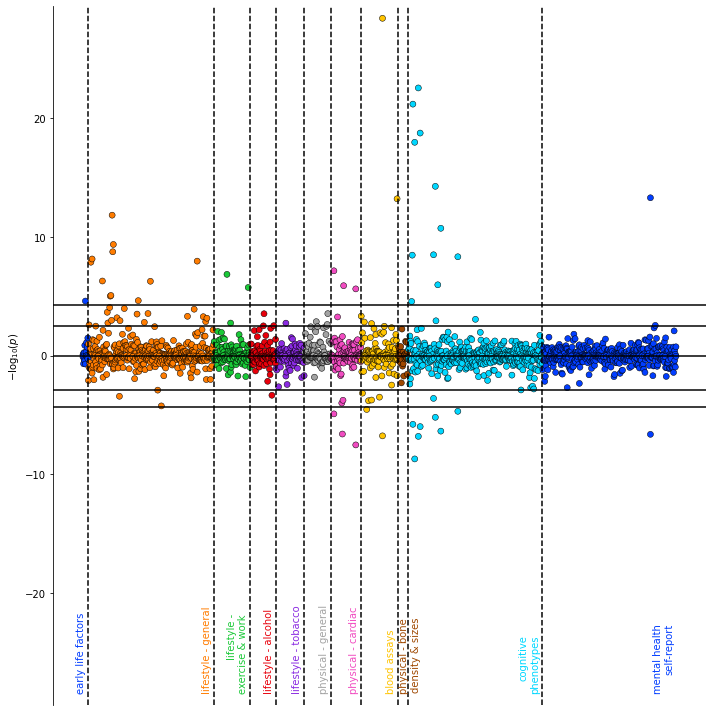

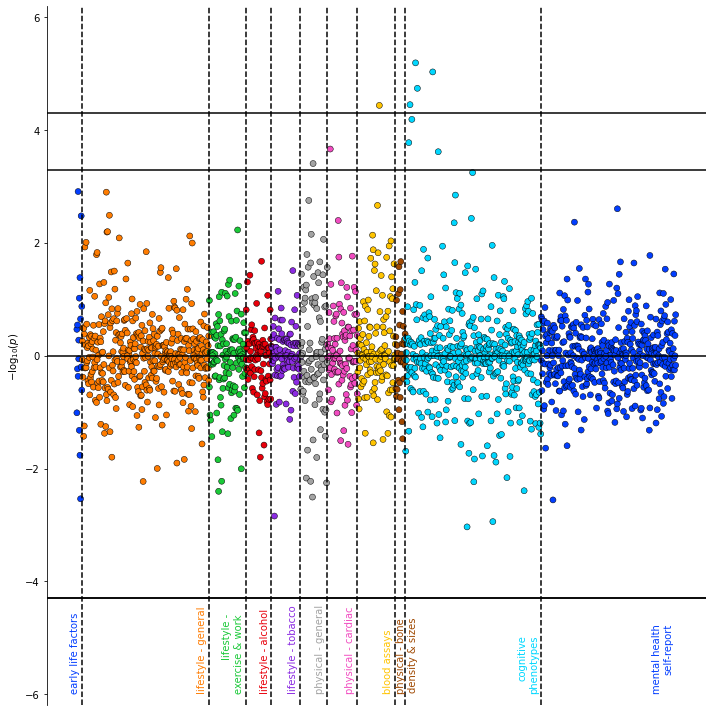

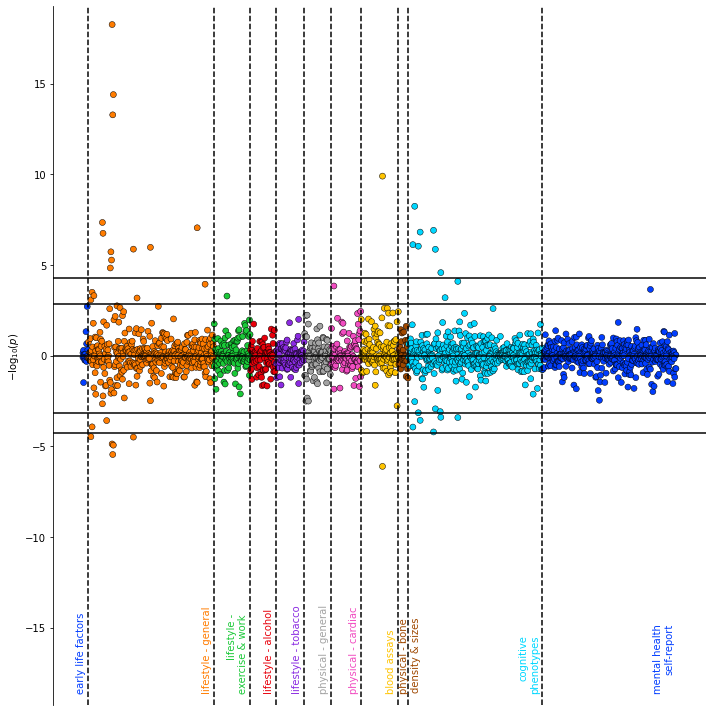

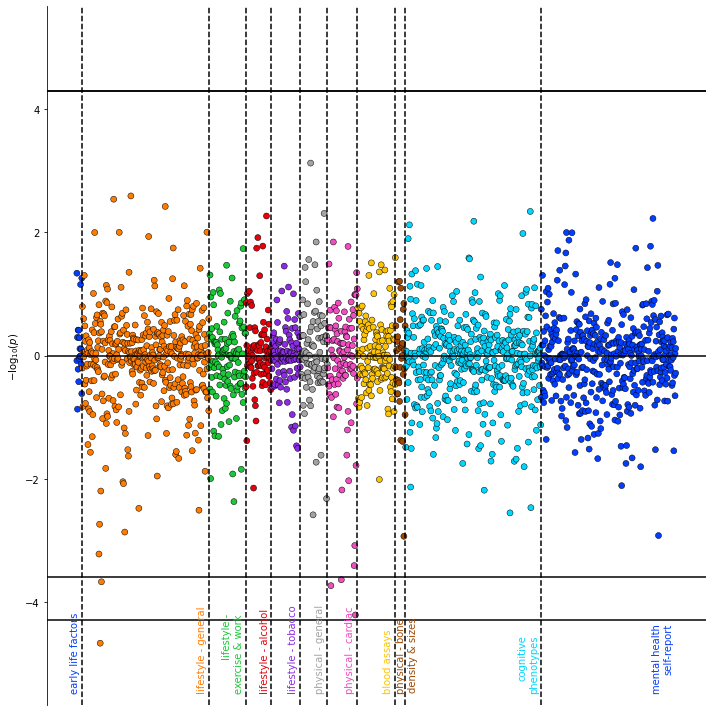

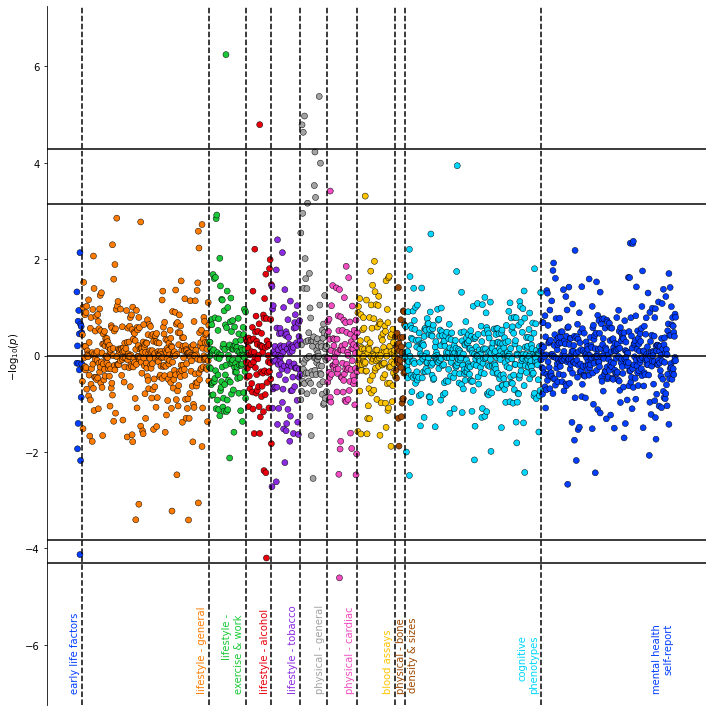

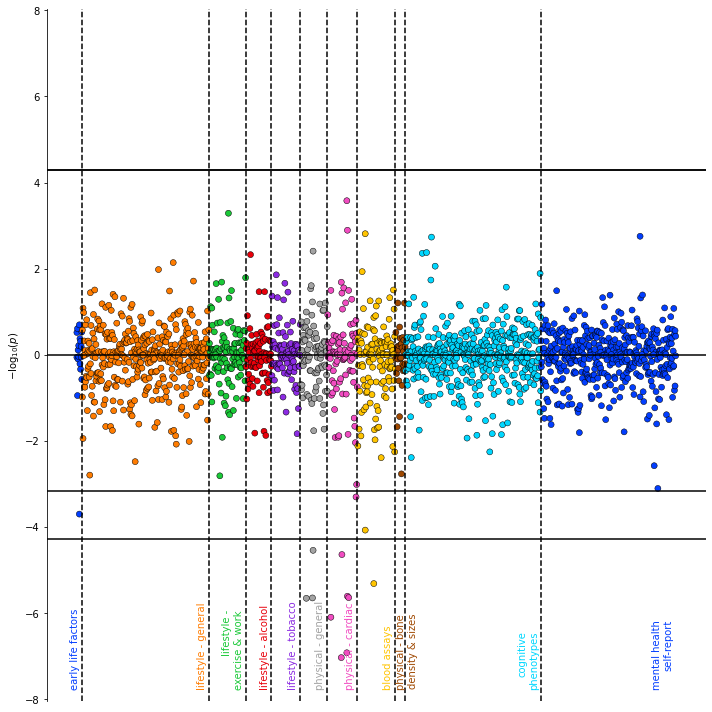

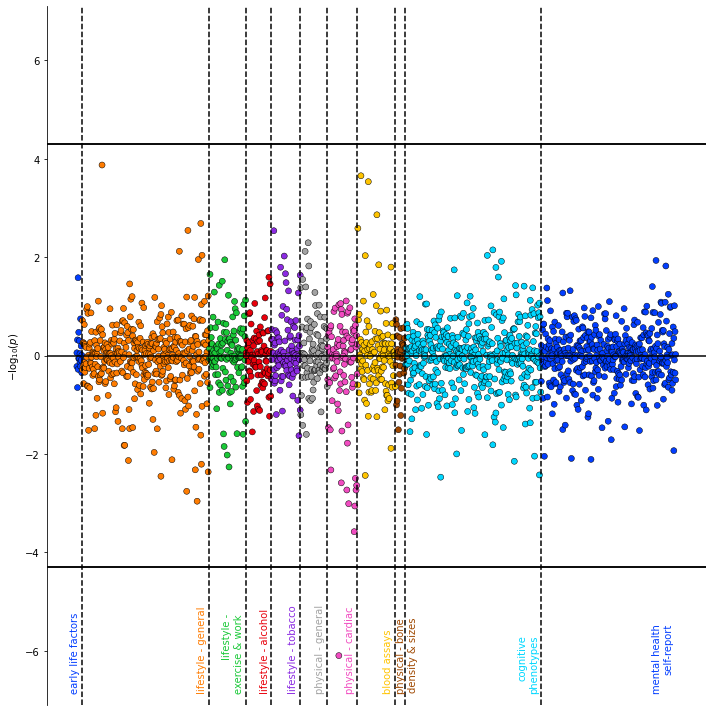

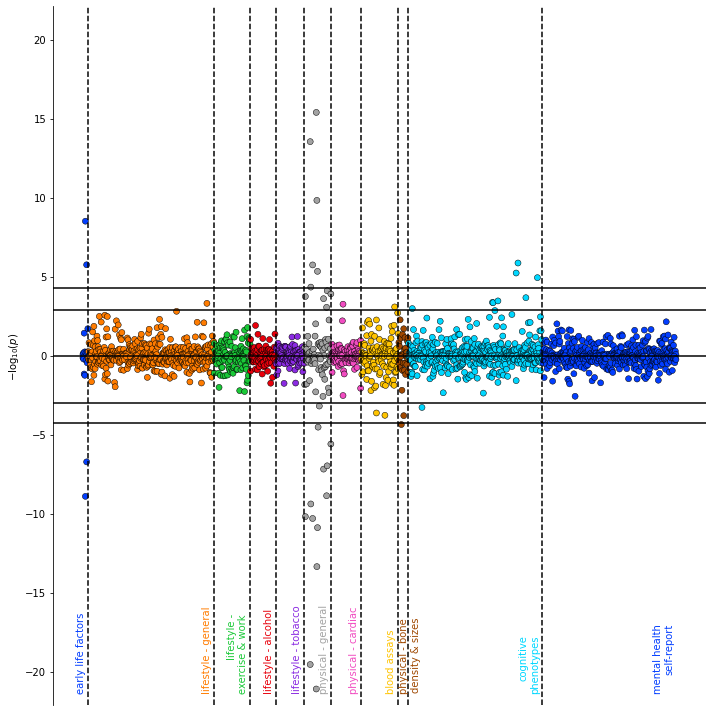

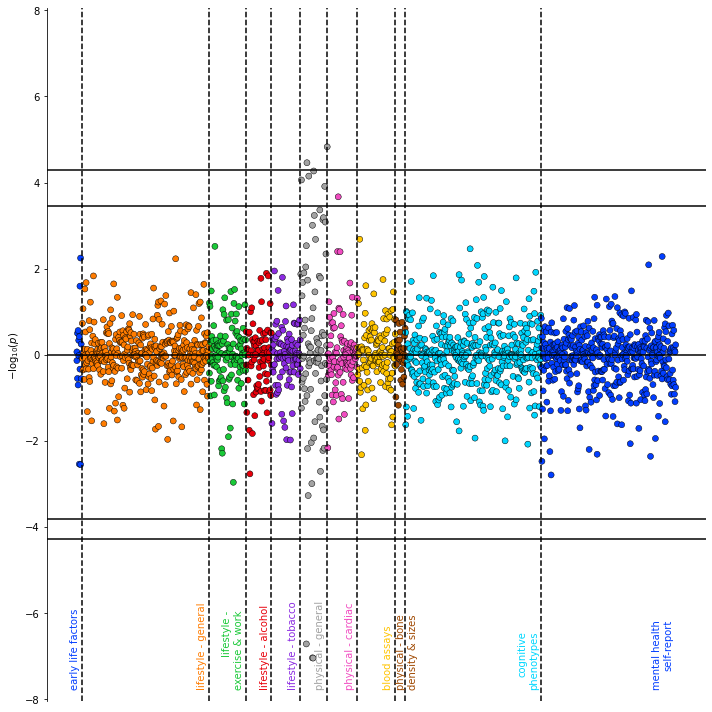

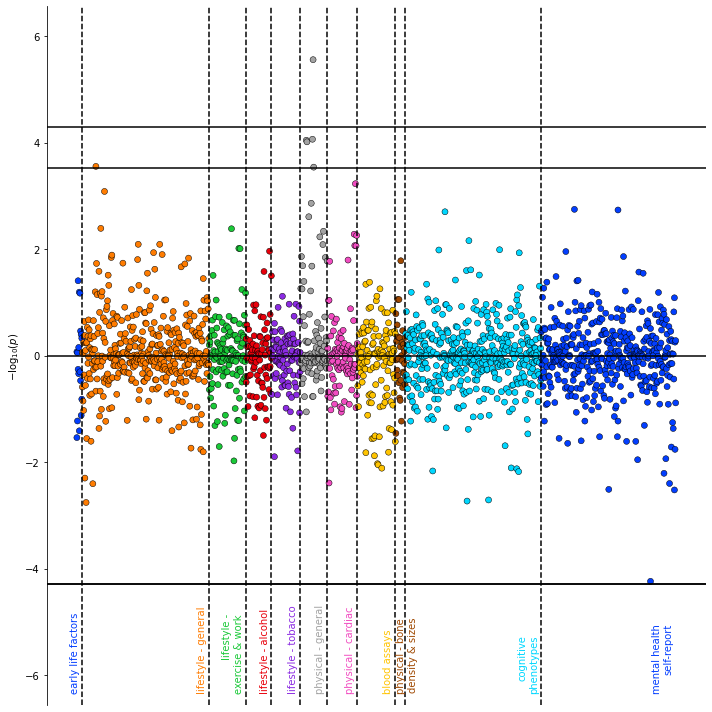

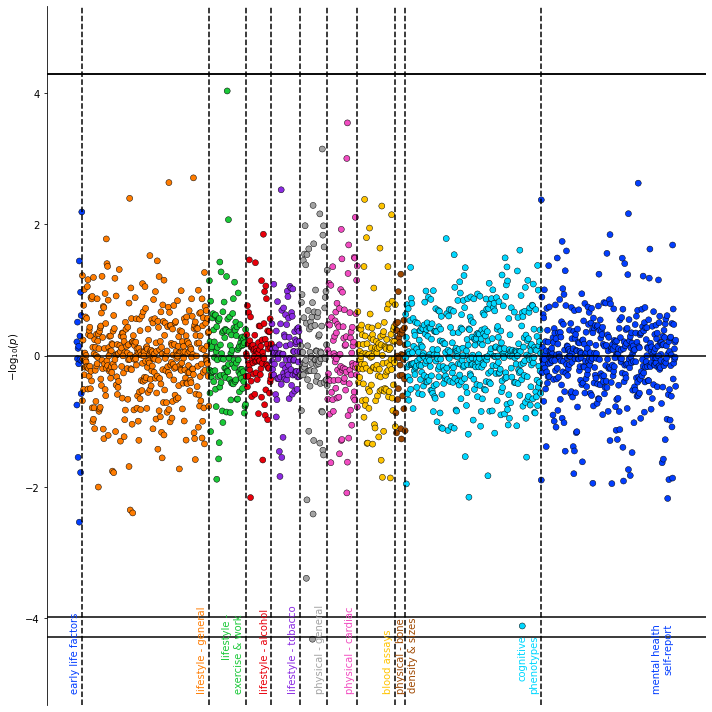

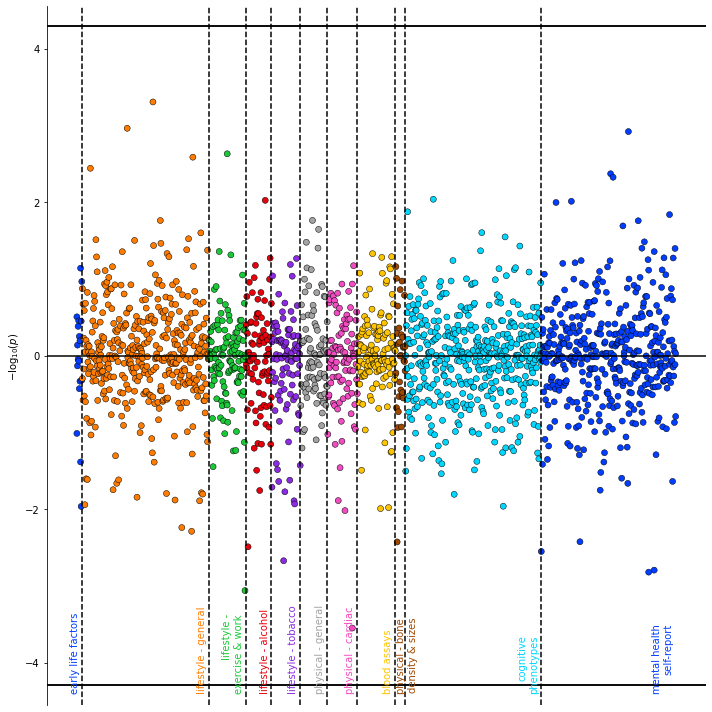

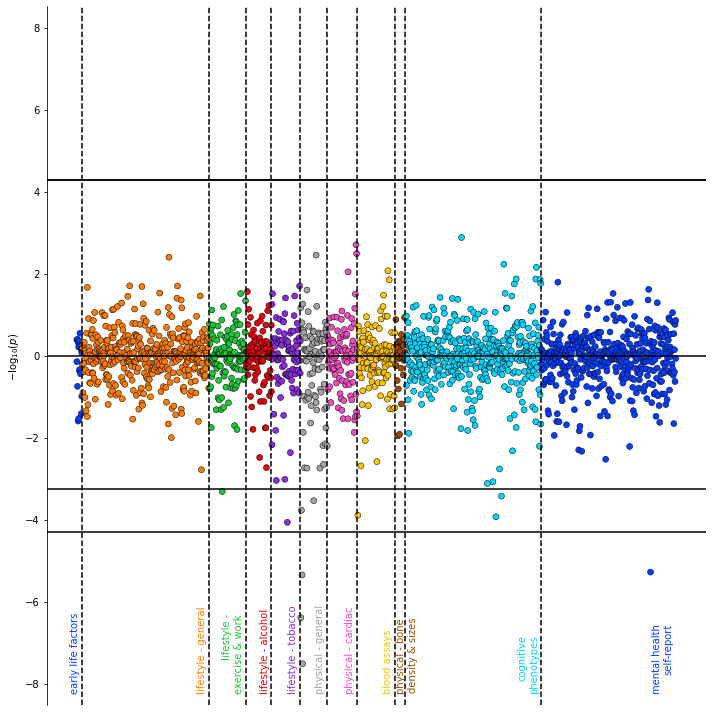

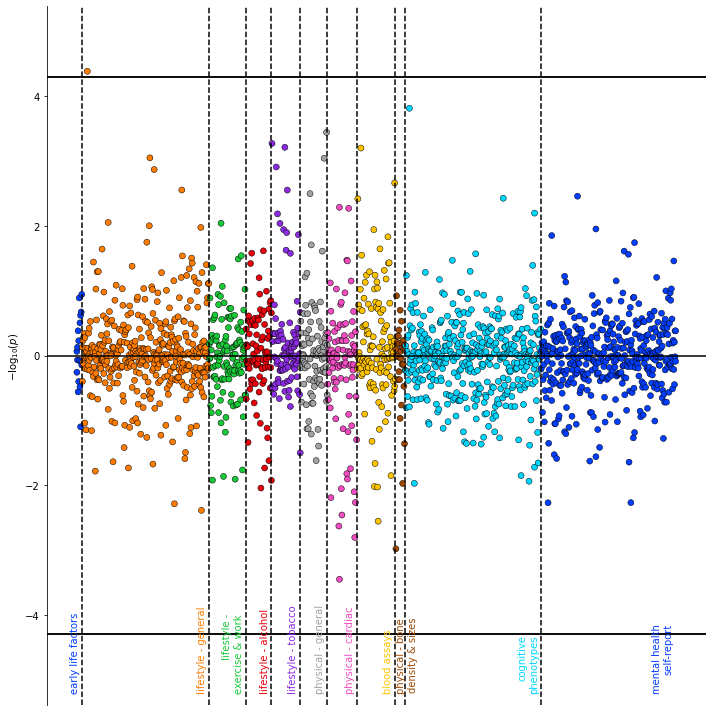

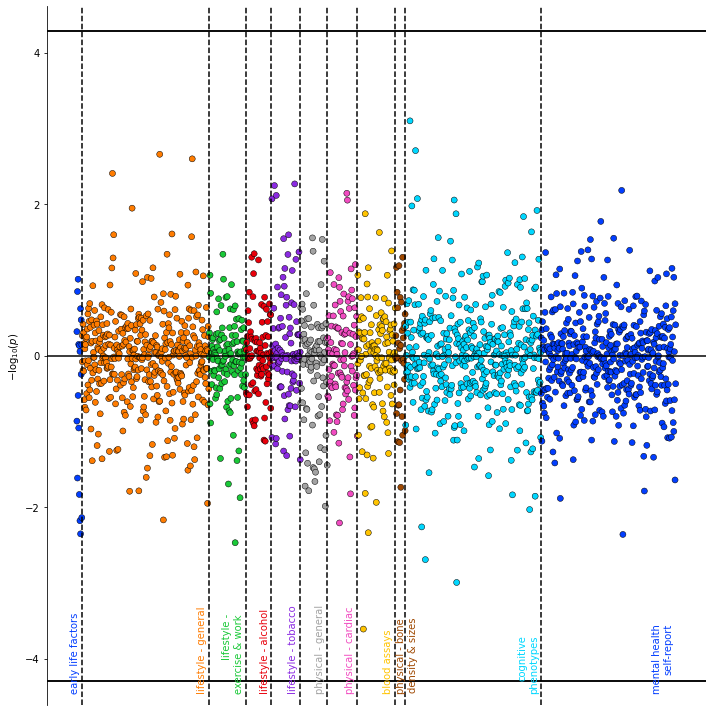

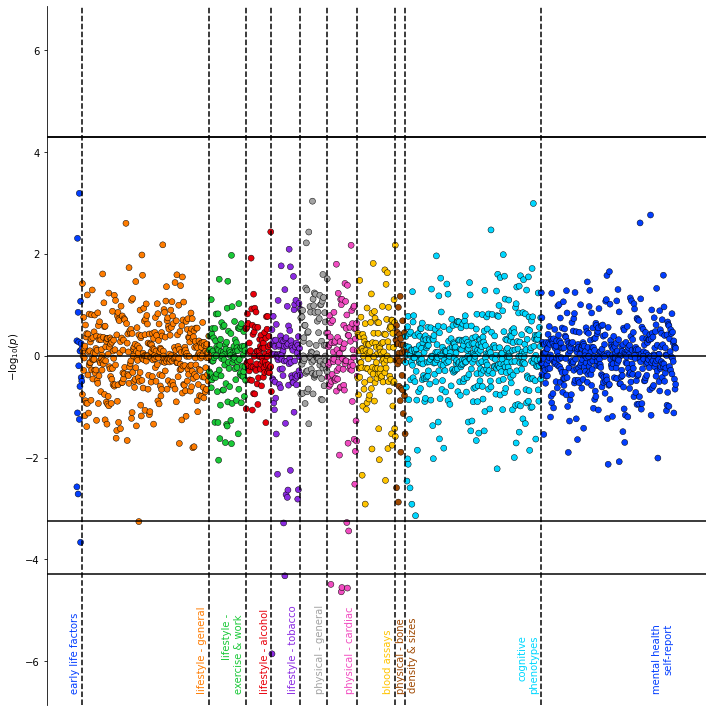

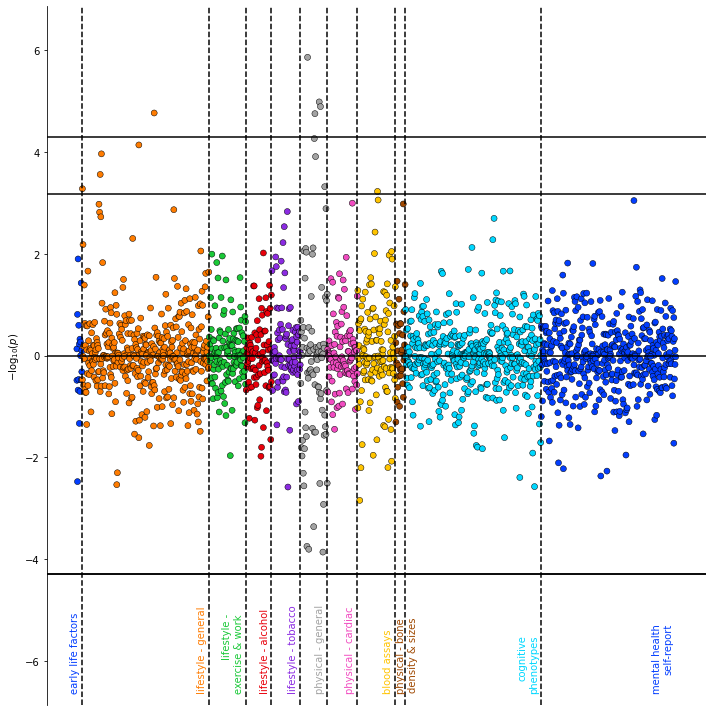

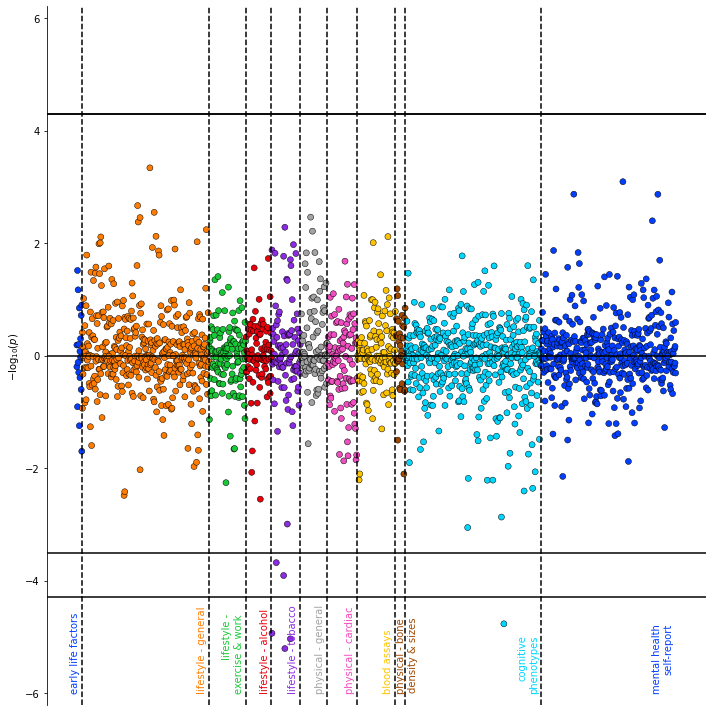

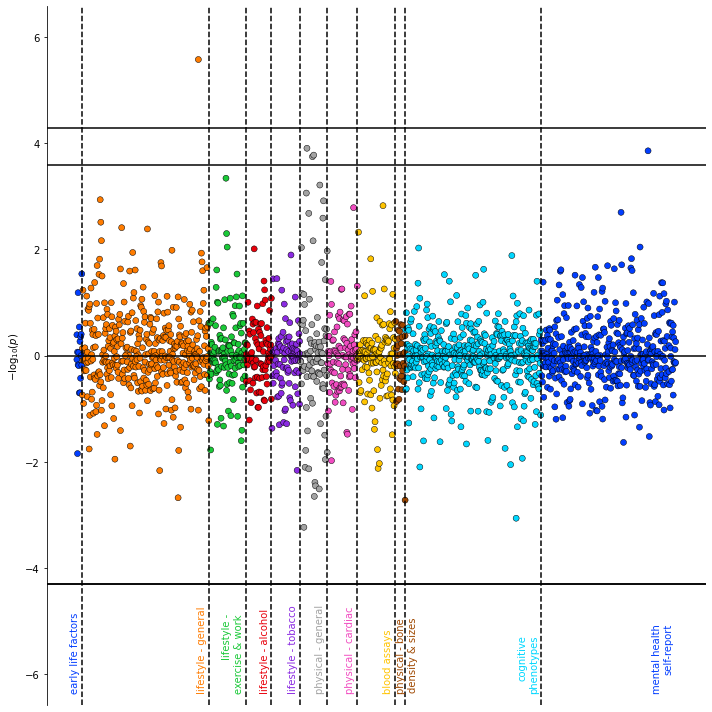

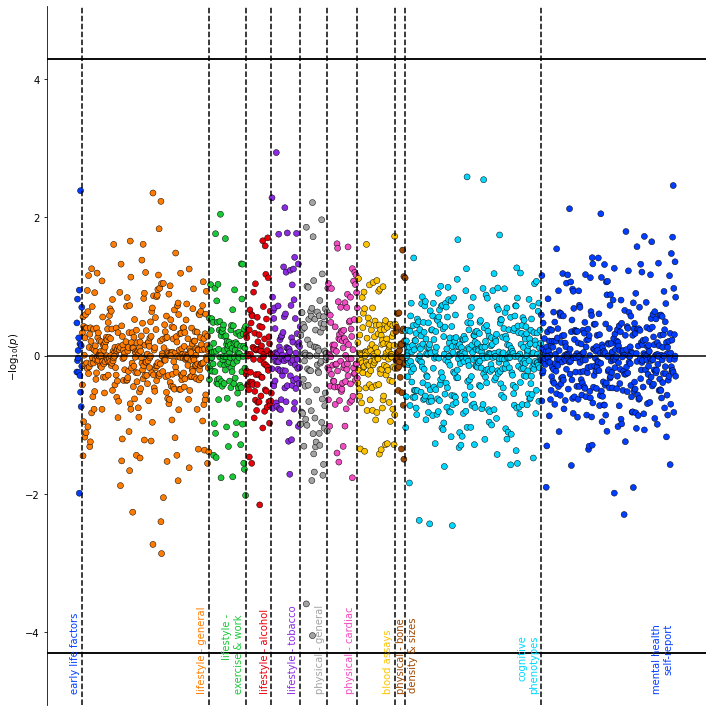

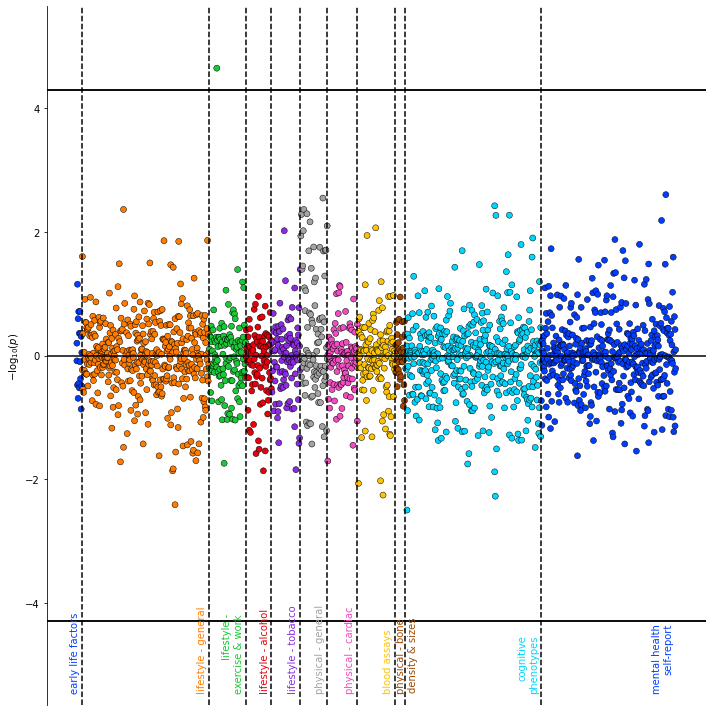

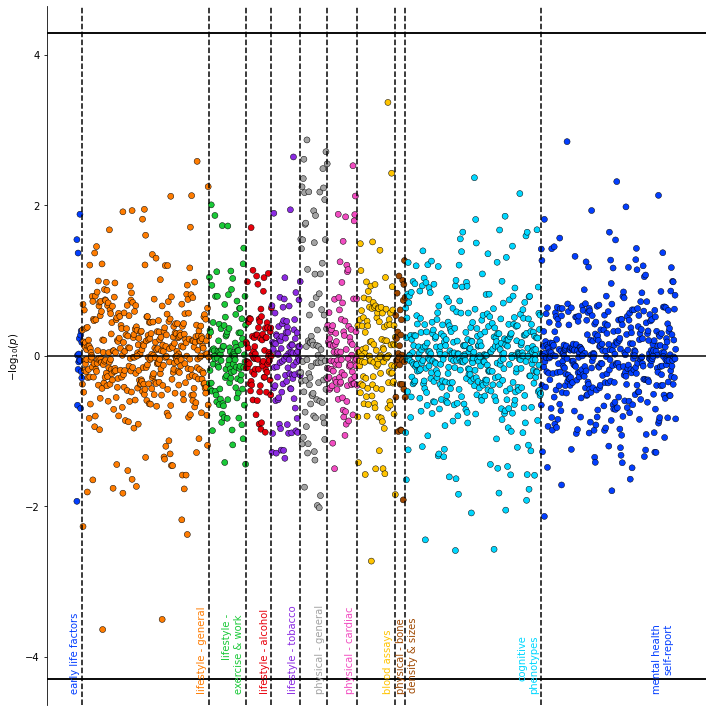

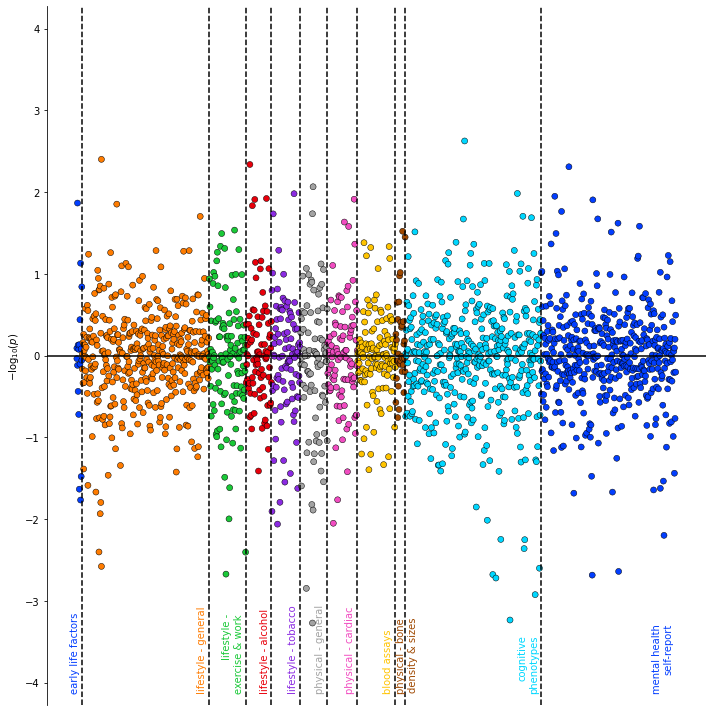

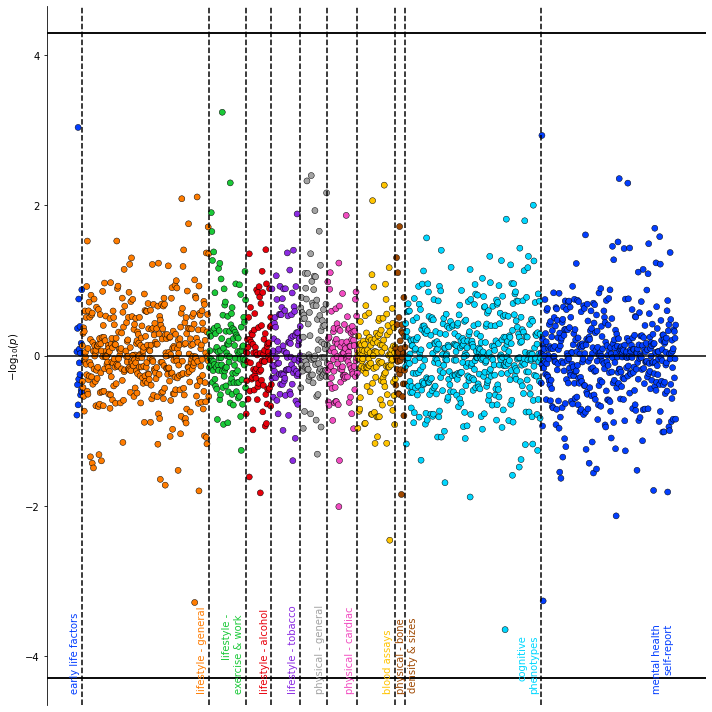

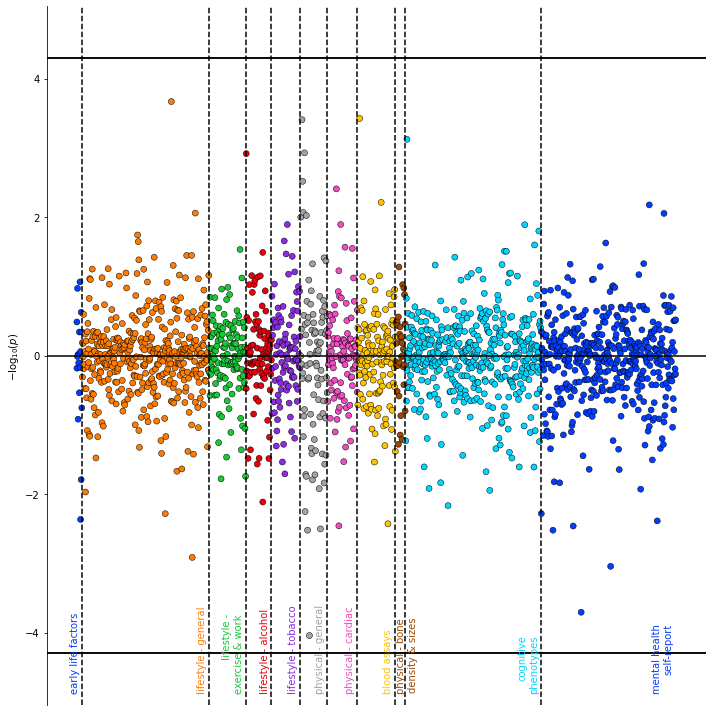

In [16]:
for i in range(1,26):
    lk = f'Probability_Mode_{i}'
    cat_name = man_plot.cat_name(corrdf_m, y_cat_dict)
    man_plot.miami_plot(corrdf_m, corrdf_f, lk, cat_name)
    
    #print significant correlation to a file
    man_plot.hits(corrdf_m, lk, y_desc_dict, y_cat_dict, useFDR = True, extra_notes = 'hits/MALES', to_file = True)
    man_plot.hits(corrdf_f, lk, y_desc_dict, y_cat_dict, useFDR = True, extra_notes = 'hits/FEMALES', to_file = True)
    #plt.savefig(os.path.abspath(f'/Users/chloesavignac/_CCA_plots/november/miami_apoe/{lk}.png'), dpi=200)
    